## Figure 2: Numerical simulations for the propagation of the Gaussian wave packets.
This notebook reproduces the figure which shows: (a) The x-component magnetization mx at t = 1.32 ns for a sinusoidal pulse u1 and a rectangular pulse u2: a Gaussian wave packet is generated for u2 case. In the simulation α = 0.015 and β = 0.03 have been used. Inset: Plots of current densities u1 and u2 as a function of time. (b) The mx profilesatt1 =0.32ns and t3 =0.8ns for a uniform charge current u = 400 m/s with β = 0.05. (c) Same as (b) but t2 =0.56ns,β=0.1 and u=500m/s.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 10,
        }

In [2]:
def load_data():
    m = np.load('dyn1/m_66.npy')
    m.shape = (-1,3)
    mx = m[:,0]
    m2 = np.load('dyn2/m_66.npy')
    m2.shape = (-1,3)
    mx2 = m2[:,0]
    return mx, mx2

def load_data1(n1,n2):
    m = np.load('beta_0.05_u_400/m_%d.npy'%n1)
    m.shape = (-1,3)
    mx = m[:,0]
    m2 = np.load('beta_0.05_u_400/m_%d.npy'%n2)
    m2.shape = (-1,3)
    mx2 = m2[:,0]
    return mx, mx2


def load_data2(n1,n2):
    m = np.load('beta_0.1_u_500/m_%d.npy'%n1)
    m.shape = (-1,3)
    mx = m[:,0]
    m2 = np.load('beta_0.1_u_500/m_%d.npy'%n2)
    m2.shape = (-1,3)
    mx2 = m2[:,0]
    return mx, mx2

def update_fun1(t):
    return (1-np.cos(t*np.pi/2.0))/2.0

def update_fun2(t):
    t1 = t%2.0
    if t1<1.0:
        return 0
    else:
        return 1.0

In [3]:
def custom_legend(legend):
    frame = legend.get_frame()
    frame.set_facecolor('0.90')
    
    # Set the fontsize
    for label in legend.get_texts():
        label.set_fontsize(12)

    for label in legend.get_lines():
        label.set_linewidth(1.5)

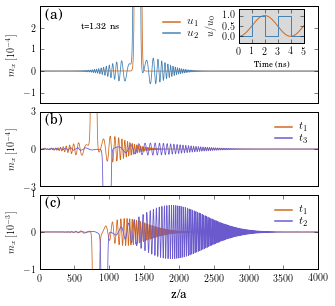

In [4]:
plt.rc('font', **font)

    
#the system latex will be used when swithed on, maybe quite slow
plt.rc('text', usetex=True)

fig = plt.figure(figsize=(4.5, 4.2))
gs = gridspec.GridSpec(3, 1,height_ratios=[1.3,1,1])
        
#figure (a)        
ax1 = plt.subplot(gs[0])
xs = np.linspace(0.5,3999.5,4000)
m1,m2 = load_data()
    
p1,= ax1.plot(xs,m1*1e4,'-', linewidth=0.8, color='chocolate', label='$u_1$')   
p2,= ax1.plot(xs,m2*1e4,'-', linewidth=0.8, color='steelblue', label='$u_2$')

ax1.set_ylabel('$m_x$ $[10^{-4}]$')
ax1.set_ylim(-1.5,3)
plt.yticks([-1, 0, 1, 2])
plt.xticks([])
    
l2 = plt.legend(loc='upper center', shadow=True, frameon=False,labelspacing=0, handletextpad=0.3)
custom_legend(l2)
    
plt.text(0.02, 0.98, '(a)', fontsize=14, horizontalalignment='left', verticalalignment='top',
             transform = ax1.transAxes)

plt.text(600, 2, 't=1.32 ns', fontsize=9)

#plot the inset
ts = np.linspace(0, 5, 501)
us1 = [update_fun1(t) for t in ts]
us2 = [update_fun2(t) for t in ts]
d = 1e-7
ts2=[0,1-d,1+d,2-d,2+d,3-d,3+d,4-d,4+d, 5-d]
us2=[0,0,1,1,0,0,1,1,0,0]
ax = fig.add_axes([0.72, 0.86, 0.20, 0.11], axisbg="#D9D9D9") #
ax.plot(ts,us1, label='$u_1$', color='chocolate')
ax.plot(ts2,us2, '-',label='$u_2$',color='steelblue')
ax.set_ylabel(r'$u/u_0$')
ax.set_xlabel('Time (ns)',fontsize=8)
ax.set_ylim([-0.3,1.3])

ax.yaxis.set_ticks([0,0.5,1])

#figure (b)
ax0 = plt.subplot(gs[1])
xs = np.linspace(0.5,3999.5,4000)
m1,m2 = load_data1(16,40)
    
p1,= ax0.plot(xs,m1*1e4,'-', linewidth=0.8, color='chocolate', label='$t_1$')   
p2,= ax0.plot(xs,m2*1e4,'-', linewidth=0.8, color='slateblue', label='$t_3$')
    
ax0.set_ylabel('$m_x$ $[10^{-4}]$')
ax0.set_ylim(-3,3)
ax0.set_xlim(0,4000)
plt.xticks([])
plt.yticks([-3, 0, 3])
    
l2 = plt.legend(loc='upper right', shadow=True, frameon=False,labelspacing=0, handletextpad=0.3)
custom_legend(l2)

plt.text(0.02, 0.98, '(b)', fontsize=14, horizontalalignment='left', verticalalignment='top',
             transform = ax0.transAxes)
    
#figure (c)
ax1 = plt.subplot(gs[2])
xs = np.linspace(0.5,3999.5,4000)
m1,m2 = load_data2(16,28)
    
p1,= ax1.plot(xs,m1*1e3,'-', linewidth=0.8, color='chocolate', label='$t_1$')   
p2,= ax1.plot(xs,m2*1e3,'-', linewidth=0.8, color='slateblue', label="$t_2$")
    
ax1.set_xlabel('z/a',fontsize=12)
ax1.set_ylabel('$m_x$ $[10^{-3}]$')
ax1.set_ylim(-1,1)
plt.yticks([-1, 0, 1])
ax1.set_xlim(0,4000)
    
l2 = plt.legend(loc='upper right', shadow=True, frameon=False,labelspacing=0, handletextpad=0.3)
custom_legend(l2)
    
plt.text(0.02, 0.98, '(c)', fontsize=14, horizontalalignment='left', verticalalignment='top',
             transform = ax1.transAxes)

#plt.tight_layout()
plt.subplots_adjust(left=0.105, bottom=0.11, right=0.965, top=0.98, hspace=0.1)
    
fig.savefig('fig2.pdf')